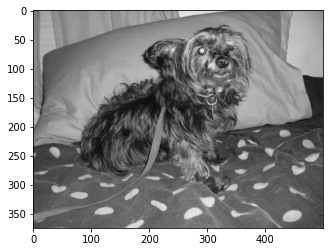

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/yan.esteves/Documents/Experimentos/IATrends/Samples/DogCats/dataset/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

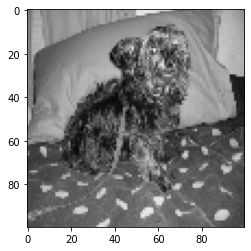

In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [01:15<00:00, 164.97it/s]

24946


In [7]:
import random

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
0
1
1
1
0


In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[237]
   [237]
   [233]
   ...
   [235]
   [236]
   [233]]

  [[247]
   [247]
   [243]
   ...
   [235]
   [236]
   [235]]

  [[236]
   [238]
   [231]
   ...
   [235]
   [235]
   [234]]

  ...

  [[211]
   [211]
   [211]
   ...
   [188]
   [185]
   [183]]

  [[209]
   [211]
   [210]
   ...
   [186]
   [184]
   [182]]

  [[209]
   [211]
   [210]
   ...
   [187]
   [183]
   [180]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [17]:
X[1]

array([[[141],
        [ 90],
        [215],
        ...,
        [181],
        [190],
        [144]],

       [[135],
        [ 92],
        [216],
        ...,
        [219],
        [220],
        [175]],

       [[133],
        [ 90],
        [216],
        ...,
        [222],
        [220],
        [178]],

       ...,

       [[158],
        [147],
        [115],
        ...,
        [ 58],
        [ 65],
        [ 67]],

       [[160],
        [152],
        [105],
        ...,
        [ 63],
        [ 53],
        [ 64]],

       [[155],
        [155],
        [ 91],
        ...,
        [ 58],
        [ 51],
        [ 65]]], dtype=uint8)